In [35]:
%matplotlib inline

import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy as np

db = MongoClient('localhost',27017)['twitter_db']

# Make a query to the specific DB and Collection
collection = db['twitter_collection']



# Tweets per Language

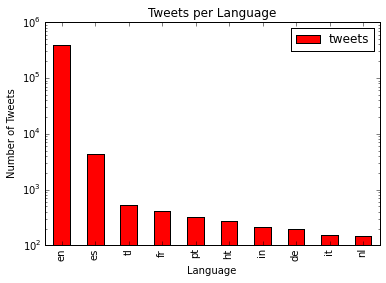

In [62]:
cursor = collection.aggregate(
    [
        {"$group": {"_id": "$lang", "count": {"$sum": 1}}},
        { "$sort": { "count": -1 }}
    ]
)
langFrame = pd.DataFrame(list(cursor))
langFrame.columns = ['lang','tweets']
langFrame = langFrame[langFrame['lang'] != 'und']
langFrame[:10].plot(x='lang',y='tweets',kind='bar',logy=True,color='red')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.title('Tweets per Language')
plt.savefig('language_graph.png',dpi=180)